# NNIA Assignment 7

**DEADLINE: 12. 1. 2022 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Trevor Atkins & trat00001@uni-saarland.de 
- Tsimafei Prakapenka & tspr00001@uni-saarland.de
- Hours of work per person: Prakapenka ~4h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

# Neural Network Implementation: Training and Optimization

In Assignment 5, you have implemented the forward pass and backpropagation from scratch. Congratulations! Now you can train your network.

In this exercise, we will go back to working with [the PyTorch Datasets Class](https://pytorch.org/vision/stable/datasets.html) to obtain
[the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Our goal is to benchmark our simple neural network by classifying the images in this dataset into their proper classes.

You have learned about regularization and optimization techniques during the previous lectures. In this exercise, you will get to have some more hands-on practice to improve this simple neural network.

## 1 SGD, Batch, Mini-Batch  (1.5 pts)

Recall from Assignment 5 that when we train our model, we are trying to solve the following minimization function via stochatic gradient descent:

$$ \begin{align}
\tag{15}
\min_{\theta} \tilde J (\theta) 
\end{align}$$

Typically neural networks are large and are trained with millions of data points. It is thus often infeasible to compute the gradient $\nabla_{\theta} \tilde J(\theta)$ that requires the accumulation of the gradient over the entire training set. 

There are various online resources on Stochastic, Batch, and Minit-Gradient Descent methods in addition to what was covered during the lecture. Here are a few:

- [Medium: Batch , Mini-Batch and Stochastic gradient descent](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461)
- [DeepLearningAI: Batch vs Mini-Batch](https://youtu.be/4qJaSmvhxi8)

**Discuss pros and cons of (1) stochastic (m=1), (2) batch (m = size of dataset) and (3) mini-batch gradient descent** (m is the number of points passed at a time).

## <font color="green">Answer</font>


### 1

- Stochastic: 
  - Pros: 
    - Faster than batch and mini-batch
  - Cons:
    - Less accurate than batch and mini-batch

- Batch: 
  - Pros: 
    - More accurate than stochastic and mini-batch
  - Cons:
    - Less fast than batch and mini-batch

- Mini-Batch: 
  - Pros: 
    - More accurate than stochastic and faster than batch
  - Cons:
    - Less fast than stochastic and less accurate than batch  

## 2: Training Implementation (4 pts)

In this question we will implement the `training` and `predicting` functions to the *NeuralNetworkModel* Class in `solution.py` we worked on previously in the last assignment. The inialization and the loss computation is provided as a solution from the previous assignment. You may use your own implementation from the previous assignment or the one provided as long as you get similar results.

In this exercise, you will be following the Mini-Batch Gradient Descent approach in training the model. The skeleton code in `solution.py` includes momentum in the training.(You can read more about what that is in [Chapter 8: Optimization for Training Deep Models](https://www.deeplearningbook.org/contents/optimization.html) in [Goodfellow et al. (2016)](https://www.deeplearningbook.org/))

**Implement the code in `solution.py`** 

## 2 <font color="red"> To Do </font>



### 2.1 Write the pseudocode steps for updating the gradients in a mini-batch gradient descent algorithm (1 pt)
Make sure to include learning rate, batch-size, iteration limit.

Your pseudocode: 



### 2.2 Implementation (2 pt)
Implement the `train` and `predict` functions in `solution.py`. Use the following default hyperparameters to train your model:

* num_epocs = 4
* learning_rate = 1e-5
* reg = 0.1
* learning_rate_decay = 0.95

(Hint: with the deafult parameters above, you should get the validation accuracy of around 23%.)

**Fill in the missing code below to load the dataset**

You may need to import necessary modules.

In [1]:
# %%capture
# ! pip install wget

In [2]:
import os
import wget

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
if not os.path.isfile('solution.py'):
    wget.download(
        'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Neural_Networks/HW7_solution.py',
        'solution.py',
    )

if not os.path.isfile('utils.py'):
    wget.download(
        'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Neural_Networks/HW7_utils.py',
        'utils.py',
    )

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from solution import NeuralNetworkModel, get_cifar10_dataset

In [6]:
BATCH_SIZE = 200

In [7]:
train_loader, test_loader, val_loader, classes = get_cifar10_dataset(batch_size=BATCH_SIZE)

val_dataset_tensor = next(iter(val_loader))
X_val, y_val = val_dataset_tensor[0], val_dataset_tensor[1]

test_dataset_tensor = next(iter(test_loader))
X_test, y_test = test_dataset_tensor[0], test_dataset_tensor[1]

Files already downloaded and verified
Files already downloaded and verified


In [8]:
print(X_val.shape, X_test.shape)

torch.Size([1000, 3072]) torch.Size([10000, 3072])


In [9]:
# for batch_idx, (X_train, y_train) in enumerate(train_loader):
#     print(batch_idx, X_train, y_train, len(y_train), X_train.shape)
#     break

In [10]:
hyperparams = {
    'num_epochs': 4,
    'learning_rate': 1e-5,
    'reg': 0.1,
    'learning_rate_decay': 0.95,
    'batch_size': BATCH_SIZE,
    'input_size': X_val.shape[1],
    'hidden_size': 128,
    'output_size': len(classes),
}

In [11]:
# Train the network with default hyperparameters
model = NeuralNetworkModel(input_size=hyperparams['input_size'],
                           hidden_size=hyperparams['hidden_size'],
                           output_size=hyperparams['output_size'])

train_metrics = model.train(train_dataloader=train_loader,
                            X_val=X_val,
                            y_val=y_val, 
                            learning_rate=hyperparams['learning_rate'],
                            learning_rate_decay=hyperparams['learning_rate_decay'], 
                            num_epochs=hyperparams['num_epochs'])

batch 1 / 383: loss 2.302553
batch 101 / 383: loss 2.298725
batch 201 / 383: loss 2.294884
batch 301 / 383: loss 2.255740
Epoch 1 / 4:
Training Accuracy: 0.1171875
Validation Accuracy: 0.145
Loss: 2.247197579443918
batch 1 / 383: loss 2.215842
batch 101 / 383: loss 2.150008
batch 201 / 383: loss 2.112459
batch 301 / 383: loss 2.086168
Epoch 2 / 4:
Training Accuracy: 0.193359375
Validation Accuracy: 0.202
Loss: 2.0875233278249117
batch 1 / 383: loss 2.105411
batch 101 / 383: loss 1.995794
batch 201 / 383: loss 1.957928
batch 301 / 383: loss 2.100420
Epoch 3 / 4:
Training Accuracy: 0.25390625
Validation Accuracy: 0.264
Loss: 1.9925324834199947
batch 1 / 383: loss 2.064007
batch 101 / 383: loss 2.010504
batch 201 / 383: loss 1.931363
batch 301 / 383: loss 1.991801
Epoch 4 / 4:
Training Accuracy: 0.30859375
Validation Accuracy: 0.266
Loss: 2.013512321396097


### 2.3 Ploting (1 pt)
One strategy for getting insight into what's going on during training is to plot the loss and the accuracies on the training and validation sets. Submit 2 plots:

(1) Loss vs loss update steps 

(2) training and validation accuracies vs Iterations (Epochs)

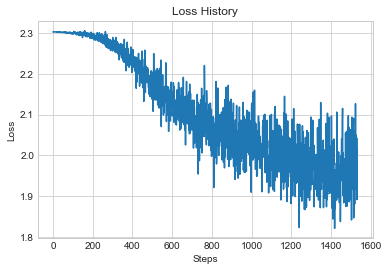

In [14]:
# Show your plots here. Make sure to label your axes and give descriptive titles.

loss_history = train_metrics['loss_history']

x = np.linspace(0, len(loss_history), len(loss_history))
plt.plot(x, loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

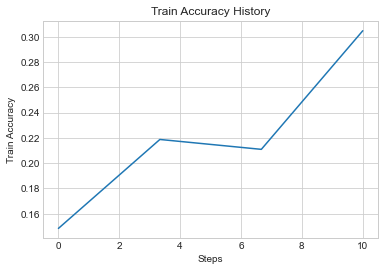

In [17]:
# Show your plots here. Make sure to label your axes and give descriptive titles.

train_acc_history = train_metrics['train_acc_history']

x = np.linspace(0, len(train_acc_history), len(train_acc_history))
plt.plot(x, train_acc_history)
plt.xlabel('Steps')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy History')
plt.show()

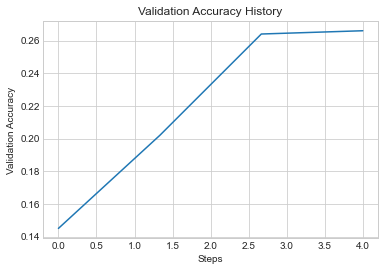

In [18]:
# Show your plots here. Make sure to label your axes and give descriptive titles.

val_acc_history = train_metrics['val_acc_history']

x = np.linspace(0, len(val_acc_history), len(val_acc_history))
plt.plot(x, val_acc_history)
plt.xlabel('Steps')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy History')
plt.show()

## 3 Fine-Tuning (2 pts + 1 Bonus pts)

With default hyperparameters, if previous questions have been done correctly, you should get validation set accuracy of at least around 23%. Can we do better?. 

### Fine-Tuning (1 + 1 = 2 pts)

Your task is to fine-tune the model training and come up with a better set of hyper-parameters to improve the performance on the validation set from the default results. **(1 pt)** Visualize the training and validation performance curves to help with this analysis.

(Note: if you decided to change the batch size from 200, with the way the skeleton code is implemented, you will have to adjust this in the `get_cifar10_dataset` function and reload your Dataloaders.)

**Justify** The hyperparameters you are modifying and **discuss** the effects of adjusting these hyperparameters on your validation results. **(1 pt)**

**Bonus 1 pt:** Experiment with different combinations of hyperparameters and report the evaluation results on the test set from your best model.



## 3 <font color="red"> To Do </font>

In [19]:
from solution import find_best_model
# your implementation here

# TODO
# 1) increase epoch num.
# 2) Try 32-64-128-256-512 batch size
# 3) Try learning rates: 1e-5, 1e-4, 1e-3
# 4) Visualise train and validation curve on the same plot, possibly move visualization code to function in solution.py 

## 4 Data Augmentation in Natural Language Processing (NLP) (2.5 pts)

You have learned about data augmentation as a regularization technique to reduce overfitting. For image data, you can do various transformations. For natural language processing problems, this is not as straight-forward.

Read about [Data Augmentation in NLP by Shahul E.S.](https://neptune.ai/blog/data-augmentation-nlp). For a fuller picture, you can also have a look at [the Visual Survey of Data Augmentation in NLP by Amit Chaudhary](https://amitness.com/2020/05/data-augmentation-for-nlp/). 

After consulting the above resources, answer the following questions:


1. In computer vision, data augmentation happens on the go, whereas in NLP data is augmented before training. Why is it so? Explain in 3-4 sentences. (0.5 pts)

2. Data augmentation in NLP is very task-specific and should be applied carefully. Provide an example of a augmentation method  and task pair where data augmentation might harm the model. Justify your answer (2-4 sentences). A (non-exhaustive) list of NLP tasks you can be found at the [Natural Language Understanding Wiki](https://natural-language-understanding.fandom.com/wiki/List_of_natural_language_processing_tasks). You can also give an example with a task not from this list. (1 pt)

3. If we perform K-fold cross-validation, do we augment data before or after splitting the data? Why? Give at least *two* reasons. (0.5 pts)

4. Does the proportion of augmented data depend on the size of the training dataset? Ex- plain why. Hint: think about the relation between training dataset size and overfitting. (0.5 pts)



## 4 <font color="red">To Do</font>

